# 텍스트 데이터 시각화

텍스트 데이터를 분석하고 이를 바탕으로 다양한 기계학습 알고리즘을 적용시킬 경우 역설적으로 텍스트 데이터를 시각화하는 요구도 커지게 된다. 이를 위해서 많이 사용되는 텍스트 데이터 시각화 방법을 살펴보자.

- 단어구름(wordcloud)
- Lexical dispersion plot
- Frequency distribution plot
- Lexical diversity dispersion plot
- Word length distribution plot




- 출처 및 참고문헌
    - [Yet Another Tech Blog (2017-10-02), "Visual Text Analytics With Python"](https://www.mien.in/2017/10/02/visual-text-analytics-with-python/)
    - [lovit (2018-04-17), "Word cloud in Python"](https://lovit.github.io/nlp/2018/04/17/word_cloud/)
    - [lucypark (2015), '파이썬으로 영어와 한국어 텍스트 다루기'](https://www.lucypark.kr/courses/2015-dm/text-mining.html)

# 단어구름(wordcloud)

## 영문 단어구름

만약 `nltk` 내장된 데이터를 다운로드 받지 못한 경우 다음 명령어를 실행해서 텍스트 데이터를 설치한다.

> import nltk <br>
> nltk.download('inaugural')

다음으로 `wordcloud` 팩키지가 필요하기 때문에 이를 다음 명령어로 쉘에서 설치한다.

> pip install wordcloud

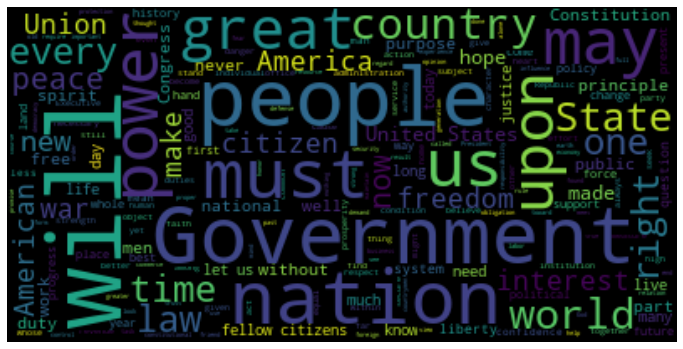

In [62]:
from nltk.corpus import inaugural
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = inaugural.raw()

wordcloud = WordCloud(max_font_size=60).generate(text)

plt.figure(figsize=(12,9))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 국문 단어구름

국문 단어구름을 제작하려면 우선 텍스트에서 단어를 생성시킨 후에 각 단어별 빈도수를 생성시켜야 한다. 이를 위해서 형태소 분석기를 통해서 명사를 추출한 후에 빈도를 구한 후에 이를 wordcloud에 넣어 시각화하는 단계를 거치게 된다.
아래와 같이 단어 빈도를 딕셔너리로 제작한 후에 `WordCloud()`에 넣는데 한글을 제대로 표현시키려면 한글폰트를 별도 지정하면 한글이 깨지는 문제를 풀 수 있다.


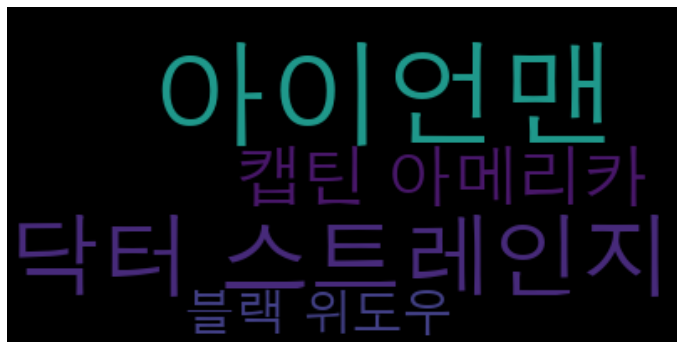

In [18]:
word_freq = {'아이언맨':10, '닥터 스트레인지':7, '캡틴 아메리카':3, '블랙 위도우':2}

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf')
wordcloud = wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(12,9))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Lexical dispersion plot

`nltk.book`을 다음 명령어를 통해서 다운로드 받는다. 그런후에 `dispersion plot`을 통해 관심있는 단어가 취임선서 어느 부분에 위치하는지를 파악해본자.

> nltk.download('genesis') <br> 
> nltk.download('nps_chat') <br>
> nltk.download('webtext') <br>
> nltk.download('treebank') <br>

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


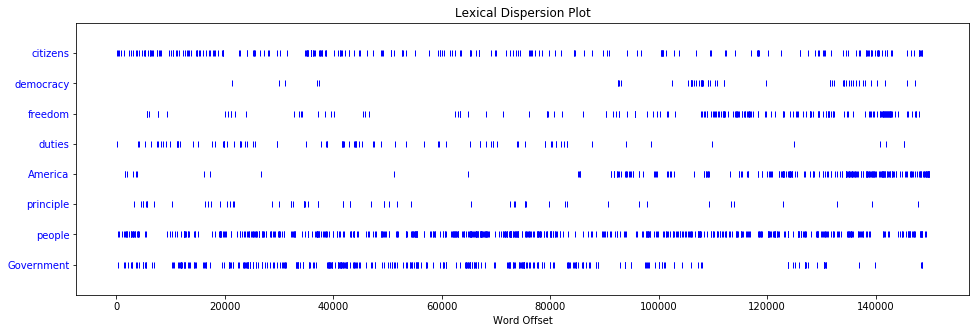

In [27]:
import nltk
from nltk.book import text4 as inaugural_speeches

plt.figure(figsize=(16,5))
topics = ['citizens', 'democracy', 'freedom', 'duties', 'America','principle','people', 'Government']
inaugural_speeches.dispersion_plot(topics)

# Frequency distribution plot

Frequency distribution plot은 말뭉치에 포함된 단어 빈도를 뽑아내서 문서 전반을 이해하는데 도움을 준다.
이를 위해서 `nltk.FreqDist()` 메쏘드를 사용한다. 이 작업과정을 기술하면 다음과 같다.

1. `brown` 말뭉치에서 추출할 토픽을 리스트로 정의한다.
1. 불용어 사전을 정의해서 불필요한 단어를 제거한다.
1. `nltk.FreqDist()` 메쏘드를 통해서 가장 빈도수가 많은 단어를 튜플 리스트로 (단어, 빈도수) 형태로 뽑아낸다.
1. `.most_common()`, `.plot()` 메쏘드로 고빈도 단어를 뽑아내고 시각화한다.

`brown` 말뭉치가 없는 경우 `nltk.download('brown')` 명령어로 다운로드 받는다.


In [46]:
from nltk.corpus import brown
from nltk.corpus import stopwords

topics = ['government', 'news', 'religion', 'adventure', 'hobbies']

stop_words = set(stopwords.words('english'))

for topic in topics:
    words = [word for word in brown.words(categories=topic)
            if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    print(topic,'more :', ' , '.join([ word.lower() for word, count in freqdist.most_common(5)]))


government more : year , states , united , may , would
news more : said , would , one , last , two
religion more : god , world , one , may , new
adventure more : said , would , back , man , one
hobbies more : one , may , time , two , first


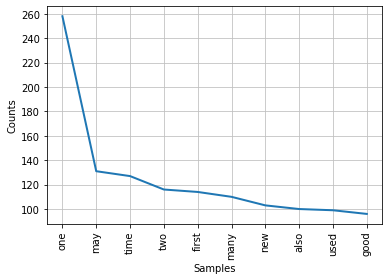

In [50]:
freqdist.plot(10)

# Lexical diversity dispersion plot

말뭉치에 포함된 단어를 기준으로 유일무이한 단어 갯수가 얼마인지를 나타내는 지표로 `Lexical Diversity(LD)`를 사용한다. 수식으로 표현하면 다음과 같다.

$$\text{Lexical Diversity(LD)} = \frac{\text{유일무이한 단어 갯수}}{\text{총 단어갯수}}$$

만약 특정 말뭉치의 총단어 갯수가 100이고 이를 구성하는 유일무이한 단어가 20이면 Lexical Diversity는 0.2가 된다.

In [55]:
def lexical_diversity(text):
    return round(len(set(text)) / len(text),2)

def get_brown_corpus_words(category, include_stop_words=False):
    '''helper method to get word array for a particular category
     of brown corpus which may/may not include the stopwords that can be toggled
     with the include_stop_words flag in the function parameter'''
    if include_stop_words:
        words = [word.lower() for word in brown.words(categories=category) if word.isalpha() ]
    else:
        words = [word.lower() for word in brown.words(categories=category)
                 if word.lower() not in stop_words and word.isalpha() ]
    return words

# calculate and print lexical diversity for each genre of the brown corpus
for genre in brown.categories():
    lex_div_with_stop = lexical_diversity(get_brown_corpus_words(genre, True))
    lex_div = lexical_diversity(get_brown_corpus_words(genre, False))
    print(f'{genre:<17}: \t {lex_div:<10} \t {lex_div_with_stop}')

adventure        : 	 0.26       	 0.13
belles_lettres   : 	 0.2        	 0.1
editorial        : 	 0.29       	 0.16
fiction          : 	 0.28       	 0.14
government       : 	 0.2        	 0.11
hobbies          : 	 0.25       	 0.13
humor            : 	 0.49       	 0.25
learned          : 	 0.16       	 0.09
lore             : 	 0.24       	 0.13
mystery          : 	 0.26       	 0.13
news             : 	 0.24       	 0.13
religion         : 	 0.32       	 0.16
reviews          : 	 0.39       	 0.21
romance          : 	 0.26       	 0.13
science_fiction  : 	 0.47       	 0.24


# Word length distribution plot

brown 말뭉치 각 쟝르별로 단어 길이를 `nltk.ConditionalFreqDist()` 메쏘드로 시각화한다.

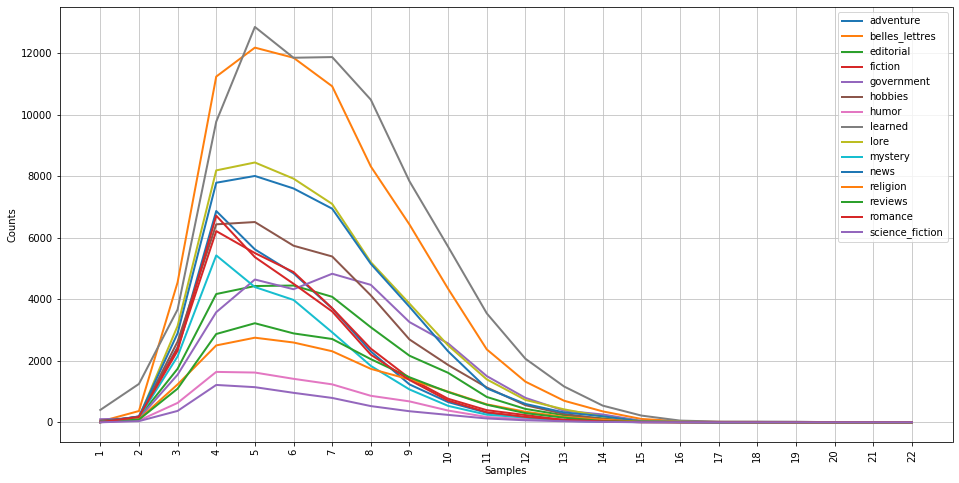

In [56]:
cfd = nltk.ConditionalFreqDist(
           (genre, len(word))
           for genre in brown.categories()
           for word in get_brown_corpus_words(genre))

plt.figure(figsize=(16,8))
cfd.plot()


# N-gram frequency distribution plot

N-gram frequency distribution plot은 Word length distribution plot을 확장한 개념이다.

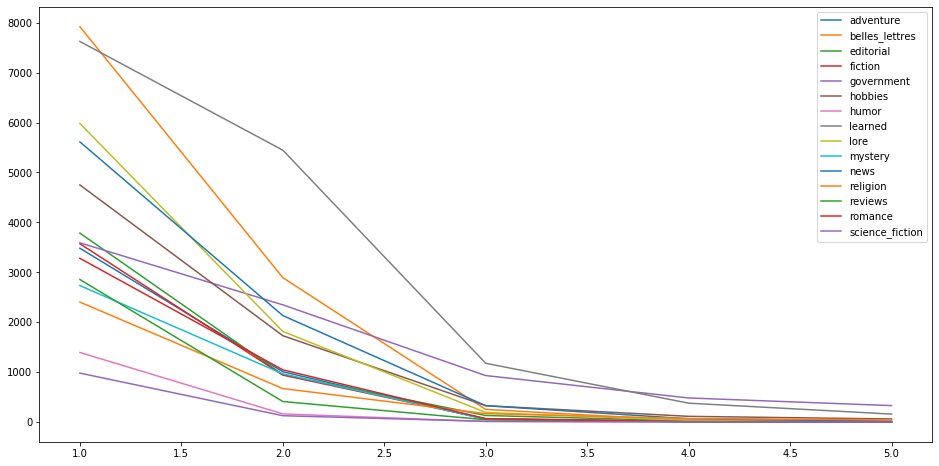

In [61]:
from nltk.util import ngrams
import numpy as np

plt.figure(figsize=(16,8))
for genre in brown.categories():
    sol = []
    for i in range(1,6):
        count = 0
        fdist = nltk.FreqDist(ngrams(get_brown_corpus_words(genre), i))
        sol.append(len([cnt for ng,cnt in fdist.most_common() if cnt > 1]))
    plt.plot(np.arange(1,6), sol, label=genre)
plt.legend()
plt.show()